# Hierarchical clustering

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## Preparando datos de prueba

In [3]:
X,y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y,
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

In [12]:
plt.rcParams['figure.figsize'] = [5,3]

## Visualización de datos

<AxesSubplot:xlabel='x1', ylabel='x2'>

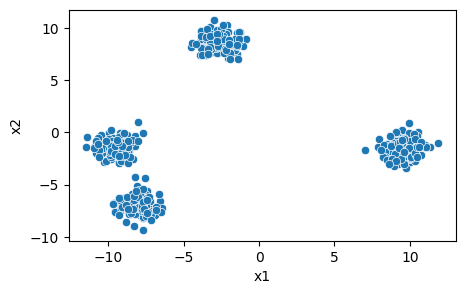

In [13]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')

## Dendrograma y hierarchical clustering

Text(0, 0.5, 'Distancia Euclideana')

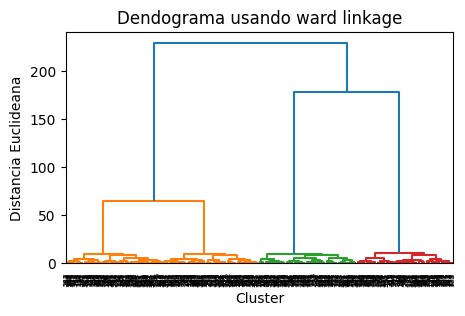

In [14]:
dendrogram_plot = dendrogram(linkage(X, method='ward'))
plt.title('Dendograma usando ward linkage')
plt.xlabel('Cluster')
plt.ylabel('Distancia Euclideana')

Notemos que por ejemplo no hay una manera sencilla de trazar una linea horizontal para escoger 5 clusters conservando distancia, mientras que para 4 e incluso 3 se observa con mucha facilidad 

In [21]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [22]:
df_blobs['cluster'] = y_hc

<AxesSubplot:xlabel='x1', ylabel='x2'>

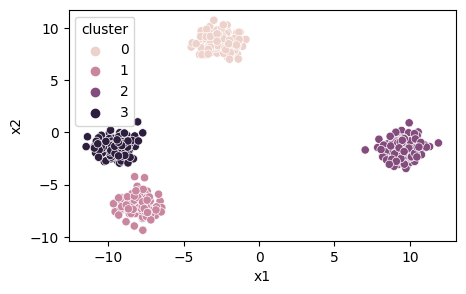

In [23]:
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')

## Evaluación de hierarchical clustering

In [24]:
silhouette_score(X, y_hc)

0.8319631183020135

Notemos que tenemos un muy uen coeficiente de silueta, sin embargo, este no se puede graficar como se hacia con kmeans ya que esta biblioteca lo grafica con los centroides, y en hierarchical clustering no hay centroides, solo distancias evaluadas.

Sin embargo, scikit-learn ha publicado una pagina en donde se puede graficar el coeficiente de silueta con hierarchical clustering, [aquí](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

For n_clusters = 4 The average silhouette_score is : 0.8319631183020135


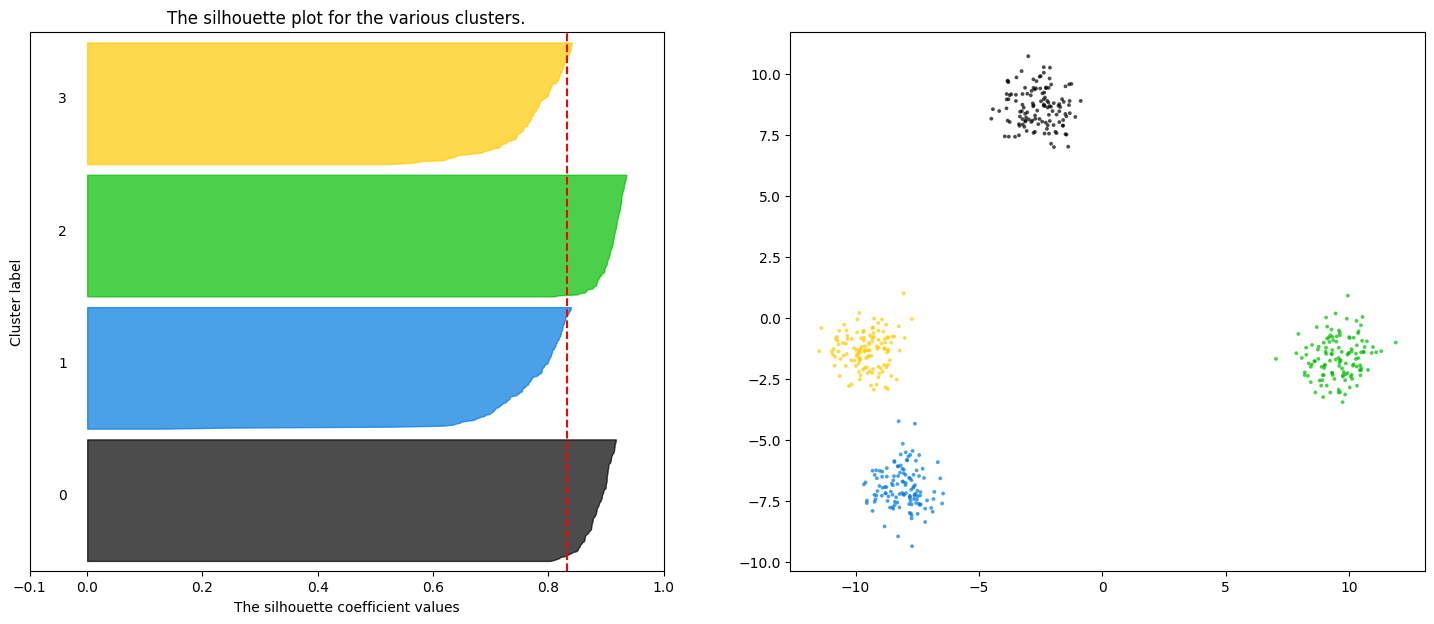

In [26]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')  ## SE MODIFICA ESTO
    cluster_labels = hc.fit_predict(X)                                                              ## Y ESTO

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

        ### SE COMENTA ESTO YA QUE NO SE TIENEN CENTROIDES

    # # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    # ax2.scatter(
    #     centers[:, 0],
    #     centers[:, 1],
    #     marker="o",
    #     c="white",
    #     alpha=1,
    #     s=200,
    #     edgecolor="k",
    # )

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    # plt.suptitle(
    #     "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    #     % n_clusters,
    #     fontsize=14,
    #     fontweight="bold",
    # )

plt.show()